In [14]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Functions

In [15]:
def load_gait_data(filenames, group):
    """
    Load gait data from files and organize into a dictionary
    
    Parameters:
    filenames (list): List of filenames to process
    group (str): Group name ('ALS' or 'Control')
    
    Returns:
    dict: Dictionary containing gait data for each patient
    """
    patient_data = {}
    
    for filename in filenames:
        # Load data file
        filepath = os.path.join('data', group, filename)
        data = np.loadtxt(filepath)
        
        # Store in dictionary with 'data' key
        patient_data[filename] = {'data': data}
    
    return patient_data

def process_gait_intervals(patient_data):
    """
    Extract and add stride, left swing, and right swing intervals to patient dictionary
    
    Parameters:
    patient_data (dict): Dictionary containing patient gait data
    
    Returns:
    dict: Updated patient dictionary with interval data added
    """
    for patient in patient_data:
        raw_data = patient_data[patient]['data']
        
        # Extract intervals
        stride_intervals = raw_data[:,3]
        left_swing_intervals = raw_data[:,4] 
        right_swing_intervals = raw_data[:,5]
        
        # Add intervals to patient data
        patient_data[patient]['stride_intervals'] = stride_intervals
        patient_data[patient]['left_swing_intervals'] = left_swing_intervals
        patient_data[patient]['right_swing_intervals'] = right_swing_intervals
    
    return patient_data

# Create a DataFrame to display ALS patient swing intervals
def create_swing_intervals_df(intervals, condition):
    swing_data = {
        'Patient': list(intervals.keys()),
        'Avg Left Swing (s)': [np.mean(intervals['left_swing_intervals']) for intervals in intervals.values()],
        'Avg Right Swing (s)': [np.mean(intervals['right_swing_intervals']) for intervals in intervals.values()]
    }
    
    swing_df = pd.DataFrame(swing_data)
    swing_df = swing_df.round(3)  # Round to 3 decimal places for readability
    
    print(f"\n{condition} Patient Swing Intervals:")
    print(swing_df)
    return swing_df


**Load Data**

In [16]:
# Get lists of filenames for ALS and control datasets
als_files = sorted(glob.glob('data/ALS/*.ts'))
control_files = sorted(glob.glob('data/Control/*.ts'))
hunt_files = sorted(glob.glob('data/Hunt/*.ts'))
park_files = sorted(glob.glob('data/Park/*.ts'))

# Create lists of just the filenames without paths
als_filenames = [os.path.basename(f) for f in als_files]
hunt_filenames = [os.path.basename(f) for f in hunt_files]
park_filenames = [os.path.basename(f) for f in park_files]
control_filenames = [os.path.basename(f) for f in control_files]

# Get lists of filenames for ALS and control .rit and .let files
als_rit_files = sorted(glob.glob('data/ALS/*.rit'))
als_let_files = sorted(glob.glob('data/ALS/*.let'))
park_rit_files = sorted(glob.glob('data/Park/*.rit'))
park_let_files = sorted(glob.glob('data/Park/*.let'))
hunt_rit_files = sorted(glob.glob('data/Hunt/*.rit'))
hunt_let_files = sorted(glob.glob('data/Hunt/*.let'))
control_rit_files = sorted(glob.glob('data/Control/*.rit'))
control_let_files = sorted(glob.glob('data/Control/*.let'))

# Create lists of just the filenames without paths
als_rit_filenames = [os.path.basename(f) for f in als_rit_files]
als_let_filenames = [os.path.basename(f) for f in als_let_files]
park_rit_filenames = [os.path.basename(f) for f in park_rit_files]
park_let_filenames = [os.path.basename(f) for f in park_let_files]
hunt_rit_filenames = [os.path.basename(f) for f in hunt_rit_files]
hunt_let_filenames = [os.path.basename(f) for f in hunt_let_files]
control_rit_filenames = [os.path.basename(f) for f in control_rit_files]
control_let_filenames = [os.path.basename(f) for f in control_let_files]



In [17]:
# Load data for neurodegenerative disease patients
als_data = load_gait_data(als_filenames, 'ALS')
park_data = load_gait_data(park_filenames, 'Park')
hunt_data = load_gait_data(hunt_filenames, 'Hunt')

# Load data for Control patients
control_data = load_gait_data(control_filenames, 'Control')

# Check that data has been loaded properly by verifying the dictionaries are not empty
# and contain the expected number of patients
print("Number of ALS patients:", len(als_data))
print("Number of Parkinson's patients:", len(park_data)) 
print("Number of Huntington's patients:", len(hunt_data))
print("Number of Control patients:", len(control_data))

# Process gait intervals for each patient group
als_intervals = process_gait_intervals(als_data)
park_intervals = process_gait_intervals(park_data)
hunt_intervals = process_gait_intervals(hunt_data)
control_intervals = process_gait_intervals(control_data)

# Create DataFrames for each condition
als_swing_df = create_swing_intervals_df(als_intervals, 'ALS')
park_swing_df = create_swing_intervals_df(park_intervals, "Parkinson's")
hunt_swing_df = create_swing_intervals_df(hunt_intervals, "Huntington's") 
control_swing_df = create_swing_intervals_df(control_intervals, 'Control')


Number of ALS patients: 13
Number of Parkinson's patients: 15
Number of Huntington's patients: 20
Number of Control patients: 16

ALS Patient Swing Intervals:
     Patient  Avg Left Swing (s)  Avg Right Swing (s)
0    als1.ts               0.391               33.322
1   als10.ts               0.369               32.500
2   als11.ts               0.411               32.682
3   als12.ts               0.677               33.341
4   als13.ts               0.497               31.467
5    als2.ts               0.400               33.664
6    als3.ts               0.386               35.138
7    als4.ts               0.468               25.984
8    als5.ts               0.425               35.142
9    als6.ts               0.425               28.879
10   als7.ts               0.532               27.072
11   als8.ts               0.407               35.187
12   als9.ts               0.471               35.672

Parkinson's Patient Swing Intervals:
      Patient  Avg Left Swing (s)  Avg Right Sw

**Define Gait Parameters**

In [18]:
def calculate_gait_parameters(patient_data):
    """
    Calculate various gait parameters for each patient
    
    Parameters:
    patient_data (dict): Dictionary containing patient gait data
    
    Returns:
    dict: Dictionary with calculated gait parameters for each patient
    """
    gait_parameters = {}
    
    for patient, data in patient_data.items():
        # Get the intervals
        left_swing = data['left_swing_intervals']
        right_swing = data['right_swing_intervals']
        stride = data['stride_intervals']
        
        # Calculate basic statistics
        parameters = {
            # Basic swing time statistics
            'mean_left_swing': np.mean(left_swing),
            'mean_right_swing': np.mean(right_swing),
            'mean_stride': np.mean(stride),
            
            # Standard deviations
            'sd1_left': calculate_sd1(left_swing),
            'sd1_right': calculate_sd1(right_swing),
            'sd1_stride': calculate_sd1(stride),
            
            'sd2_left': calculate_sd2(left_swing),
            'sd2_right': calculate_sd2(right_swing),
            'sd2_stride': calculate_sd2(stride),
            
            # Asymmetry measures
            'swing_asymmetry': calculate_asymmetry(left_swing, right_swing),
            'cv_left': coefficient_of_variation(left_swing),
            'cv_right': coefficient_of_variation(right_swing),
            'cv_stride': coefficient_of_variation(stride)
        }
        
        gait_parameters[patient] = parameters
    
    return gait_parameters

def calculate_sd1(intervals):
    """
    Calculate SD1 (short-term variability)
    SD1 represents the standard deviation of points perpendicular to the line of identity
    in a Poincaré plot
    """
    n = len(intervals)
    if n < 2:
        return np.nan
    
    # Calculate differences between consecutive intervals
    diff = np.diff(intervals)
    
    # SD1 calculation
    sd1 = np.std(diff) / np.sqrt(2)
    return sd1

def calculate_sd2(intervals):
    """
    Calculate SD2 (long-term variability)
    SD2 represents the standard deviation of points along the line of identity
    in a Poincaré plot
    """
    n = len(intervals)
    if n < 2:
        return np.nan
    
    # Calculate differences between consecutive intervals
    diff = np.diff(intervals)
    
    # SD2 calculation
    sd2 = np.sqrt(2 * np.var(intervals) - (np.var(diff) / 2))
    return sd2

def calculate_asymmetry(left_intervals, right_intervals):
    """
    Calculate gait asymmetry between left and right intervals
    
    Parameters:
    left_intervals (array): Left swing intervals
    right_intervals (array): Right swing intervals
    
    Returns:
    float: Asymmetry index
    """
    mean_left = np.mean(left_intervals)
    mean_right = np.mean(right_intervals)
    
    # Asymmetry index calculation
    asymmetry = abs(mean_left - mean_right) / ((mean_left + mean_right) / 2) * 100
    return asymmetry

def coefficient_of_variation(intervals):
    """
    Calculate coefficient of variation (CV)
    CV = (standard deviation / mean) * 100
    """
    return (np.std(intervals) / np.mean(intervals)) * 100

def create_gait_parameters_df(gait_parameters, condition):
    """
    Create a DataFrame to display gait parameters
    
    Parameters:
    gait_parameters (dict): Dictionary containing calculated gait parameters
    condition (str): Patient condition (e.g., 'ALS', 'Control')
    
    Returns:
    DataFrame: Formatted DataFrame with gait parameters
    """
    df = pd.DataFrame.from_dict(gait_parameters, orient='index')
    df = df.round(3)  # Round to 3 decimal places for readability
    
    print(f"\n{condition} Patient Gait Parameters:")
    print(df)
    return df

def plot_gait_parameters(als_params, control_params, park_params, hunt_params):
    """
    Create visualizations for gait parameters
    
    Parameters:
    *_params: DataFrames containing gait parameters for each group
    """
    # Create figure with multiple subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot SD1 comparisons
    params = ['sd1_stride', 'sd2_stride', 'swing_asymmetry', 'cv_stride']
    titles = ['SD1 of Stride Intervals', 'SD2 of Stride Intervals', 
             'Swing Asymmetry', 'Stride Interval CV']
    
    groups = [als_params, control_params, park_params, hunt_params]
    group_names = ['ALS', 'Control', 'Parkinson\'s', 'Huntington\'s']
    
    axes = [ax1, ax2, ax3, ax4]
    
    for ax, param, title in zip(axes, params, titles):
        values = [group[param].mean() for group in groups]
        errors = [group[param].std() for group in groups]
        
        ax.bar(group_names, values, yerr=errors, capsize=5)
        ax.set_title(title)
        ax.set_ylabel('Value')
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def check_calculation_example(patient_data, patient_id):
    """
    Provide a detailed text output of calculations for a single patient
    
    Parameters:
    patient_data (dict): Dictionary containing patient gait data
    patient_id (str): ID of the patient to analyze
    """
    if patient_id not in patient_data:
        print(f"Patient {patient_id} not found in the dataset")
        return
    
    print("\n=== Detailed Calculation Check ===")
    print(f"Patient ID: {patient_id}")
    
    # Get the intervals
    data = patient_data[patient_id]
    left_swing = data['left_swing_intervals']
    right_swing = data['right_swing_intervals']
    stride = data['stride_intervals']
    
    # Basic statistics
    print("\n1. Basic Swing Time Statistics:")
    print(f"Left Swing Intervals (first 5): {left_swing[:5]}")
    print(f"Right Swing Intervals (first 5): {right_swing[:5]}")
    
    mean_left = np.mean(left_swing)
    mean_right = np.mean(right_swing)
    print(f"\nMean Left Swing: {mean_left:.4f}")
    print(f"Mean Right Swing: {mean_right:.4f}")
    
    # Asymmetry calculation
    print("\n2. Asymmetry Calculation:")
    print("Formula: |ML - MR| / ((ML + MR)/2) * 100")
    print(f"Where: ML = {mean_left:.4f}, MR = {mean_right:.4f}")
    
    diff = abs(mean_left - mean_right)
    avg = (mean_left + mean_right) / 2
    asymmetry = (diff / avg) * 100
    
    print(f"Step 1: |{mean_left:.4f} - {mean_right:.4f}| = {diff:.4f}")
    print(f"Step 2: ({mean_left:.4f} + {mean_right:.4f})/2 = {avg:.4f}")
    print(f"Step 3: ({diff:.4f}/{avg:.4f}) * 100 = {asymmetry:.4f}%")
    
    # SD1 calculation
    print("\n3. SD1 Calculation (Left Swing):")
    print("Formula: SD1 = std(diff) / √2")
    
    diff_left = np.diff(left_swing)
    print(f"First 5 consecutive differences: {diff_left[:5]}")
    sd1_left = np.std(diff_left) / np.sqrt(2)
    
    print(f"Standard deviation of differences: {np.std(diff_left):.4f}")
    print(f"Final SD1: {sd1_left:.4f}")
    
    # CV calculation
    print("\n4. Coefficient of Variation (Left Swing):")
    print("Formula: CV = (standard deviation / mean) * 100")
    
    std_left = np.std(left_swing)
    cv_left = (std_left / mean_left) * 100
    
    print(f"Standard deviation: {std_left:.4f}")
    print(f"Mean: {mean_left:.4f}")
    print(f"CV = ({std_left:.4f}/{mean_left:.4f}) * 100 = {cv_left:.4f}%")
    
    print("\n=== Summary of Calculations ===")
    print(f"Swing Asymmetry: {asymmetry:.4f}%")
    print(f"Left Swing SD1: {sd1_left:.4f}")
    print(f"Left Swing CV: {cv_left:.4f}%")

# Example usage in main code:
def main():
    # ... (previous data loading code) ...
    
    # Calculate gait parameters for each group
    als_parameters = calculate_gait_parameters(als_intervals)
    control_parameters = calculate_gait_parameters(control_intervals)
    park_parameters = calculate_gait_parameters(park_intervals)
    hunt_parameters = calculate_gait_parameters(hunt_intervals)
    
    # Create DataFrames
    als_params_df = create_gait_parameters_df(als_parameters, 'ALS')
    control_params_df = create_gait_parameters_df(control_parameters, 'Control')
    park_params_df = create_gait_parameters_df(park_parameters, "Parkinson's")
    hunt_params_df = create_gait_parameters_df(hunt_parameters, "Huntington's")
    
    # Plot comparisons
    plot_gait_parameters(als_params_df, control_params_df, park_params_df, hunt_params_df)
    
    # After loading and processing data
    print("\nPerforming detailed calculation check...")
    # Get the first patient ID from the ALS data
    first_patient = list(als_data.keys())[0]
    check_calculation_example(als_data, first_patient)


In [19]:
# Assuming you have already processed the gait intervals
als_parameters = calculate_gait_parameters(als_intervals)
control_parameters = calculate_gait_parameters(control_intervals)
park_parameters = calculate_gait_parameters(park_intervals)
hunt_parameters = calculate_gait_parameters(hunt_intervals)

# Create DataFrames for each condition
als_params_df = create_gait_parameters_df(als_parameters, 'ALS')
control_params_df = create_gait_parameters_df(control_parameters, 'Control')
park_params_df = create_gait_parameters_df(park_parameters, "Parkinson's")
hunt_params_df = create_gait_parameters_df(hunt_parameters, "Huntington's")


ALS Patient Gait Parameters:
          mean_left_swing  mean_right_swing  mean_stride  sd1_left  sd1_right  \
als1.ts             0.391            33.322        0.426     0.042      4.343   
als10.ts            0.369            32.500        0.368     0.017      0.984   
als11.ts            0.411            32.682        0.397     0.018      1.526   
als12.ts            0.677            33.341        0.667     2.505      6.954   
als13.ts            0.497            31.467        0.478     0.039      2.562   
als2.ts             0.400            33.664        0.387     0.016      0.864   
als3.ts             0.386            35.138        0.441     0.038      3.979   
als4.ts             0.468            25.984        0.424     0.068      4.696   
als5.ts             0.425            35.142        0.448     0.023      3.415   
als6.ts             0.425            28.879        0.454     0.037      2.041   
als7.ts             0.532            27.072        0.472     0.039      1.757  

## Machine Learning Classification
**All 4 conditions**

Neural Network Accuracy: 0.4615

Neural Network Classification Report:
              precision    recall  f1-score   support

         ALS       1.00      0.50      0.67         4
     Control       0.43      0.75      0.55         4
Huntington's       0.25      0.33      0.29         3
 Parkinson's       0.00      0.00      0.00         2

    accuracy                           0.46        13
   macro avg       0.42      0.40      0.37        13
weighted avg       0.50      0.46      0.44        13


Confusion Matrix:
[[2 1 1 0]
 [0 3 1 0]
 [0 2 1 0]
 [0 1 1 0]]


/opt/miniconda3/envs/bme3053c/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/bme3053c/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/bme3053c/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

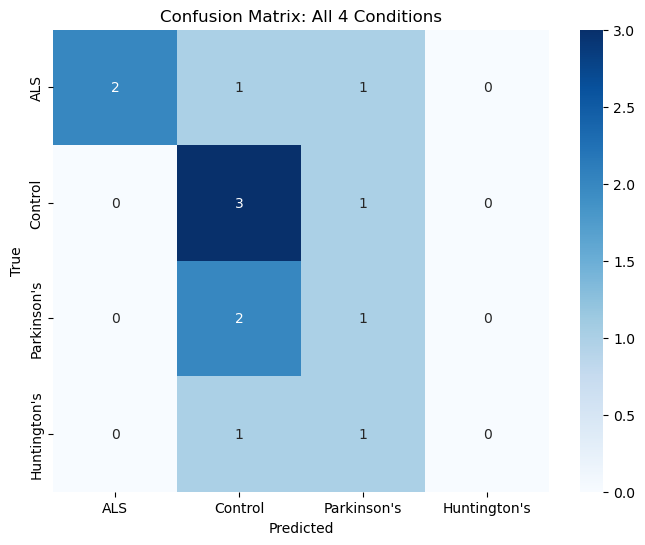

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Prepare the data for classification
def prepare_classification_data(als_params_df, park_params_df, hunt_params_df, control_params_df):
    # Combine DataFrames and create labels
    combined_df = pd.concat([als_params_df, park_params_df, hunt_params_df, control_params_df])
    labels = ['ALS'] * len(als_params_df) + ['Parkinson\'s'] * len(park_params_df) + \
             ['Huntington\'s'] * len(hunt_params_df) + ['Control'] * len(control_params_df)
    
    return combined_df, labels

# Split data into training and testing sets
combined_data, labels = prepare_classification_data(als_params_df, park_params_df, hunt_params_df, control_params_df)
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# Create and fit StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train Neural Network model
nn_model = MLPClassifier(
    hidden_layer_sizes=(1000, 500),  # Two hidden layers with 1000 and 50 neurons
    activation='relu',
    solver='adam',
    learning_rate_init=0.00001,
    random_state=42,
    max_iter=10000
)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_predictions = nn_model.predict(X_test_scaled)

# Calculate and print accuracy
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

nn_cm = confusion_matrix(y_test, nn_predictions)
print("\nConfusion Matrix:")
print(nn_cm)
plot_confusion_matrix(nn_cm, ['ALS', 'Control', 'Parkinson\'s', 'Huntington\'s'], title='Confusion Matrix: All 4 Conditions')


**ALS vs Control**

Neural Network Accuracy: 0.8333

Neural Network Classification Report:
              precision    recall  f1-score   support

         ALS       1.00      0.67      0.80         3
     Control       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6


Confusion Matrix:
[[2 1]
 [0 3]]


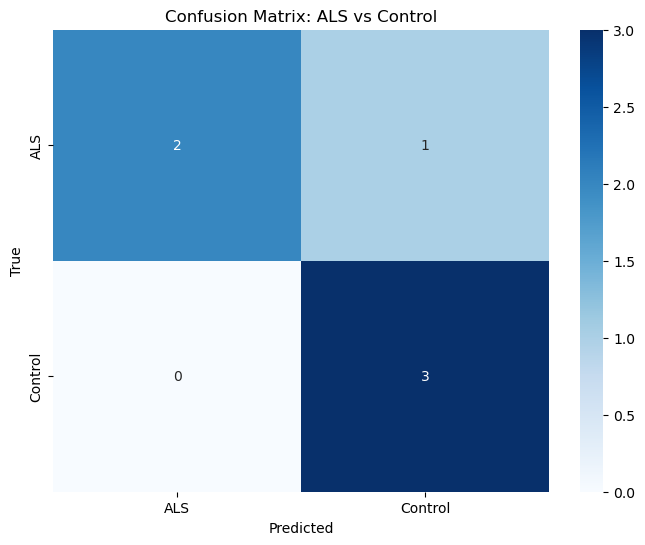

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the data for classification
def prepare_classification_data(als_params_df, control_params_df):
    # Combine DataFrames and create labels
    combined_df = pd.concat([als_params_df, control_params_df])
    labels = ['ALS'] * len(als_params_df) + \
             ['Control'] * len(control_params_df)
    
    return combined_df, labels

# Split data into training and testing sets
combined_data, labels = prepare_classification_data(als_params_df, control_params_df)
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# Create and fit StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train Neural Network model
nn_model = MLPClassifier(
    hidden_layer_sizes=(1000, 500),  # Two hidden layers with 1000 and 50 neurons
    activation='relu',
    solver='adam',
    learning_rate_init=0.00001,
    random_state=42,
    max_iter=10000
)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_predictions = nn_model.predict(X_test_scaled)

# Calculate and print accuracy
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

nn_cm = confusion_matrix(y_test, nn_predictions)
print("\nConfusion Matrix:")
print(nn_cm)
plot_confusion_matrix(nn_cm, ['ALS', 'Control'], title='Confusion Matrix: ALS vs Control')


**Huntington's vs Control**

Neural Network Accuracy: 0.7500

Neural Network Classification Report:
              precision    recall  f1-score   support

     Control       1.00      0.60      0.75         5
Huntington's       0.60      1.00      0.75         3

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8


Confusion Matrix:
[[3 2]
 [0 3]]


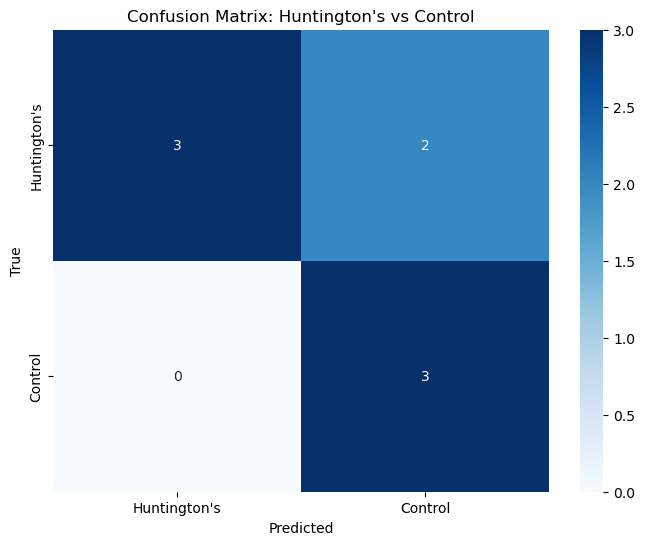

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the data for classification
def prepare_classification_data(hunt_params_df, control_params_df):
    # Combine DataFrames and create labels
    combined_df = pd.concat([hunt_params_df, control_params_df])
    labels = ['Huntington\'s'] * len(hunt_params_df) + \
             ['Control'] * len(control_params_df)
    
    return combined_df, labels

# Split data into training and testing sets
combined_data, labels = prepare_classification_data(hunt_params_df, control_params_df)
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# Create and fit StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train Neural Network model
nn_model = MLPClassifier(
    hidden_layer_sizes=(1000, 500),  # Two hidden layers with 1000 and 500 neurons
    activation='relu',
    solver='adam',
    learning_rate_init=0.00001,
    random_state=42,
    max_iter=10000
)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_predictions = nn_model.predict(X_test_scaled)

# Calculate and print accuracy
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

nn_cm = confusion_matrix(y_test, nn_predictions)
print("\nConfusion Matrix:")
print(nn_cm)
plot_confusion_matrix(nn_cm, ['Huntington\'s', 'Control'], title='Confusion Matrix: Huntington\'s vs Control')


**Parkinson's vs Control**

Neural Network Accuracy: 0.8571

Neural Network Classification Report:
              precision    recall  f1-score   support

     Control       1.00      0.80      0.89         5
 Parkinson's       0.67      1.00      0.80         2

    accuracy                           0.86         7
   macro avg       0.83      0.90      0.84         7
weighted avg       0.90      0.86      0.86         7


Confusion Matrix:
[[4 1]
 [0 2]]


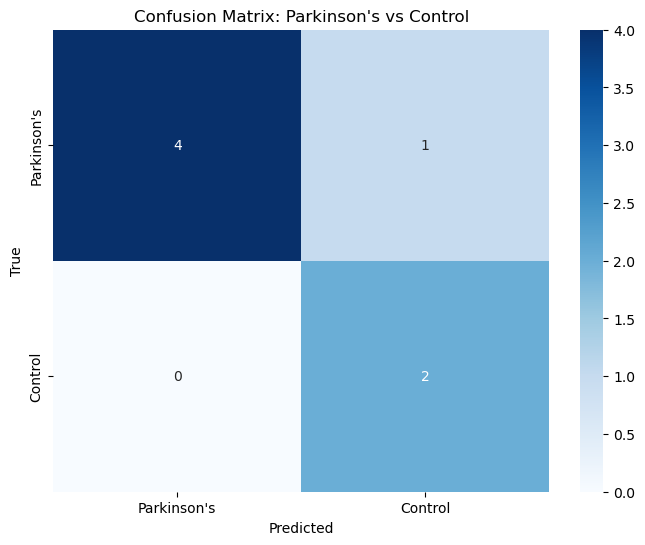

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the data for classification
def prepare_classification_data(park_params_df, control_params_df):
    # Combine DataFrames and create labels
    combined_df = pd.concat([park_params_df, control_params_df])
    labels = ['Parkinson\'s'] * len(park_params_df) + \
             ['Control'] * len(control_params_df)
    
    return combined_df, labels

# Split data into training and testing sets
combined_data, labels = prepare_classification_data(park_params_df, control_params_df)
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# Create and fit StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train Neural Network model
nn_model = MLPClassifier(
    hidden_layer_sizes=(1000, 500),  # Two hidden layers with 1000 and 50 neurons
    activation='relu',
    solver='adam',
    learning_rate_init=0.00001,
    random_state=42,
    max_iter=10000
)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_predictions = nn_model.predict(X_test_scaled)

# Calculate and print accuracy
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

nn_cm = confusion_matrix(y_test, nn_predictions)
print("\nConfusion Matrix:")
print(nn_cm)
plot_confusion_matrix(nn_cm, ['Parkinson\'s', 'Control'], title='Confusion Matrix: Parkinson\'s vs Control')
